In [1]:
!pip install update torch==2.0.1
!pip install torchtext==0.15.2
!pip install datasets==2.14.7
!pip install evaluate==0.4.0
!pip install torchvision==0.15.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 79.0 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 75.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 9.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 30.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 16.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 9.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 9.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━

In [2]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 38.9 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [3]:
!python -m spacy download it_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 24.9 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_md')


In [4]:
import os
import random
from tqdm.auto import tqdm
from dataclasses import dataclass

import pandas as pd
import numpy as np

import spacy
import en_core_web_md
import it_core_news_md

import datasets
import torchtext

import torch
import torch.nn as nn
import torch.optim as optim

#import evaluate

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import warnings
warnings.filterwarnings("ignore")


In [5]:
# set random seed

seed = 42

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [6]:

def load_data(src_lang, target_lang):
    
    dataset_name = f"{src_lang}-{target_lang}"
    ds = datasets.load_dataset("Helsinki-NLP/europarl", dataset_name, split="train[:3%]")
    
    return ds

In [7]:

dataset = load_data('en', 'it')

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1946253 [00:00<?, ? examples/s]

In [8]:

dataset

Dataset({
    features: ['translation'],
    num_rows: 58388
})

In [9]:

def remove_translation_key(dataset):
    return dataset['translation']

dataset = dataset.map(remove_translation_key, remove_columns=["translation"])

Map:   0%|          | 0/58388 [00:00<?, ? examples/s]

In [10]:

split_dataset = dataset.train_test_split(test_size=0.1, seed = seed)

train_dataset = split_dataset['train']
valid_dataset = split_dataset['test']

In [11]:

train_dataset[0]

{'en': 'I quote from the Commission\'s own document which says: "The Scientific, Technical and Economic Committee for Fisheries found no evidence that stocks had, in general, deteriorated or improved since the adoption of MAGP4."',
 'it': 'Il documento della Commissione recita testualmente: "Il comitato scientifico, tecnico ed economico per la pesca non ha riscontrato alcun elemento che consenta di affermare che le riserve, in linea generale, sono aumentate o diminuite a seguito dell\' adozione del quarto PPO" .'}

In [62]:

with pd.option_context('display.max_colwidth', None):
    example_df = pd.DataFrame(train_dataset[:5])
    display(example_df)

,en,it
0,"I am surprised, however, at the fact that many want to achieve this by means of Community policy. This is not desirable, either from the point of view of tourism itself or the stimulation of employment.","Quello che mi meraviglia è che molti intendano perseguire i suddetti obiettivi attraverso una politica comune, il che non appare opportuno né sotto il profilo del turismo stesso né sotto quello della promozione dell'occupazione."
1,"A number of other hydro-electric schemes planned over the last 30 years in Turkey have raised matters of concern, such as the effect on displaced farmers.","Altri progetti idroelettrici pianificati negli ultimi trent' anni in Turchia hanno suscitato preoccupazione, ad esempio per le conseguenze sugli agricoltori sfollati."
2,"In my view, it will hardly enable us to present the accession activities conducted by the Union to the citizens of Cyprus and Malta as evidence of the fact that it is worth their while joining.",Credo che con questa presentazione delle attività di preadesione da parte dell' Unione europea sarà difficile convincere i cittadini di Cipro e Malta che vale la pena entrare in questo processo.
3,"It is a demand for simple justice and for democracy and, as such, a condition for political legitimacy.","Si tratta di un' esigenza di semplice giustizia e democrazia e, quindi, di una condizione necessaria per garantire la legittimità politica."
4,I would urge him to do so for his answer will determine the way in which we decide to vote on the various proposed amendments we have before us.,"Gli chiederei per favore di prendere posizione, poiché dalla sua risposta dipende anche la votazione in merito a diversi emendamenti."


In [12]:

en_nlp = en_core_web_md.load()
it_nlp = it_core_news_md.load()

In [13]:

def tokenize_example(    
    
    example,
    en_nlp,
    de_nlp,
    max_length,
    lower,
    sos_token,
    eos_token
):
    '''
    Tokenizes a textual English-German input pair.    
    Args:
        example: (dict) a dictionary with one phrase in English and German; keys 'en', 'de'
        en_nlp: (spacy.lang) a spacy language model for English
        de_nlp: (spacy.lang) a spacy language model for German
        max_length: (int) max input sentence length, symbols
        lower: (bool) if to lowercase input
        sos_token: (str) a start_of_sequence token
        eos_token: (str) an end_of_sequence token
    
    Return:    
        (dict) pre-processed and tokenized input sequence  
    '''
    en_tokens = [token.text for token in en_nlp.tokenizer(example['en'])][:max_length]
    de_tokens = [token.text for token in de_nlp.tokenizer(example['it'])][:max_length]
    if lower:
        en_tokens = [token.lower() for token in en_tokens]
        de_tokens = [token.lower() for token in de_tokens]
    en_tokens = [sos_token] + en_tokens + [eos_token]
    de_tokens = [sos_token] + de_tokens + [eos_token]
    return {"en_tokens": en_tokens, "it_tokens": de_tokens}

In [14]:

# Pre-process input data

max_length = 200
lower = True
sos_token = "<sos>"
eos_token = "<eos>"

fn_kwargs = {
    "en_nlp": en_nlp, 
    "de_nlp": it_nlp, 
    "max_length": max_length,
    "lower": lower,
    "sos_token": sos_token,
    "eos_token": eos_token,
}

train_dataset = train_dataset.map(tokenize_example, fn_kwargs=fn_kwargs)
valid_dataset = valid_dataset.map(tokenize_example, fn_kwargs=fn_kwargs)

Map:   0%|          | 0/52549 [00:00<?, ? examples/s]

Map:   0%|          | 0/5839 [00:00<?, ? examples/s]

In [15]:

train_dataset

Dataset({
    features: ['en', 'it', 'en_tokens', 'it_tokens'],
    num_rows: 52549
})

In [16]:

# Creating a vocab

min_freq = 2 # minimum frequency of occurrence in the text
unk_token = "<unk>" # unknown token
pad_token = "<pad>" # padding token

special_tokens = [
    unk_token,
    pad_token,
    sos_token,
    eos_token,
]

en_vocab = torchtext.vocab.build_vocab_from_iterator(
    train_dataset["en_tokens"],
    min_freq=min_freq,
    specials=special_tokens,
)

it_vocab = torchtext.vocab.build_vocab_from_iterator(
    train_dataset["it_tokens"],
    min_freq=min_freq,
    specials=special_tokens,  
)

In [17]:

assert en_vocab[unk_token] == it_vocab[unk_token]
assert en_vocab[pad_token] == it_vocab[pad_token]

unk_index = en_vocab[unk_token]
pad_index = en_vocab[pad_token]

print(unk_index)
print(pad_index)

print(en_vocab['the'])

0
1
4


In [18]:

# Setting default value for oov words

en_vocab.set_default_index(unk_index)
it_vocab.set_default_index(unk_index)

In [19]:

def numericalize_example(example, en_vocab, it_vocab):
    '''
    Creates a mapping from string tokens to the vocabulary indexes.
    '''
    en_ids = en_vocab.lookup_indices(example["en_tokens"])
    it_ids = it_vocab.lookup_indices(example["it_tokens"])
    return {"en_ids": en_ids, "it_ids": it_ids}


In [20]:

fn_kwargs = {
    "en_vocab": en_vocab, 
    "it_vocab": it_vocab
}

train_dataset = train_dataset.map(numericalize_example, fn_kwargs=fn_kwargs)
valid_dataset = valid_dataset.map(numericalize_example, fn_kwargs=fn_kwargs)

Map:   0%|          | 0/52549 [00:00<?, ? examples/s]

Map:   0%|          | 0/5839 [00:00<?, ? examples/s]

In [21]:

train_dataset[0]

{'en': 'I quote from the Commission\'s own document which says: "The Scientific, Technical and Economic Committee for Fisheries found no evidence that stocks had, in general, deteriorated or improved since the adoption of MAGP4."',
 'it': 'Il documento della Commissione recita testualmente: "Il comitato scientifico, tecnico ed economico per la pesca non ha riscontrato alcun elemento che consenta di affermare che le riserve, in linea generale, sono aumentate o diminuite a seguito dell\' adozione del quarto PPO" .',
 'en_tokens': ['<sos>',
  'i',
  'quote',
  'from',
  'the',
  'commission',
  "'s",
  'own',
  'document',
  'which',
  'says',
  ':',
  '"',
  'the',
  'scientific',
  ',',
  'technical',
  'and',
  'economic',
  'committee',
  'for',
  'fisheries',
  'found',
  'no',
  'evidence',
  'that',
  'stocks',
  'had',
  ',',
  'in',
  'general',
  ',',
  'deteriorated',
  'or',
  'improved',
  'since',
  'the',
  'adoption',
  'of',
  'magp4',
  '.',
  '"',
  '<eos>'],
 'it_token

In [22]:

# Data to torch Dataset format

data_type = "torch"
format_columns = ["en_ids", "it_ids"]

train_dataset = train_dataset.with_format(
    type=data_type, 
    columns=format_columns, 
    output_all_columns=True
)

valid_dataset = valid_dataset.with_format(
    type=data_type, 
    columns=format_columns, 
    output_all_columns=True,
)

In [23]:

def get_collate_fn(pad_index):
    '''
    Adding padding as a part of a collate_fn.
    '''
    
    def collate_fn(batch):
        batch_en_ids = [example["en_ids"] for example in batch]
        batch_de_ids = [example["it_ids"] for example in batch]
        batch_en_ids = nn.utils.rnn.pad_sequence(batch_en_ids, padding_value=pad_index)
        batch_de_ids = nn.utils.rnn.pad_sequence(batch_de_ids, padding_value=pad_index)
        batch = {
            "en_ids": batch_en_ids,
            "it_ids": batch_de_ids,
        }
        return batch
    
    return collate_fn

In [24]:

def get_data_loader(dataset, batch_size, pad_index, shuffle=False):
    
    collate_fn = get_collate_fn(pad_index)
    
    data_loader = torch.utils.data.DataLoader(
        dataset=dataset,
        batch_size=batch_size,
        collate_fn=collate_fn,
        shuffle=shuffle,
    )
    
    return data_loader

In [25]:

batch_size = 32

train_data_loader = get_data_loader(train_dataset, batch_size, pad_index, shuffle=True)
valid_data_loader = get_data_loader(valid_dataset, batch_size, pad_index)

In [26]:

next(iter(train_data_loader))

{'en_ids': tensor([[  2,   2,   2,  ...,   2,   2,   2],
         [101,  17,  17,  ...,  17,   4,  33],
         [568,  36,  26,  ...,  36, 140,  46],
         ...,
         [  1,   1,   1,  ...,   1,   1,   1],
         [  1,   1,   1,  ...,   1,   1,   1],
         [  1,   1,   1,  ...,   1,   1,   1]]),
 'it_ids': tensor([[   2,    2,    2,  ...,    2,    2,    2],
         [ 502,  165,  118,  ...,    9,   11,   50],
         [   7,  107, 2373,  ...,  421,  134,   45],
         ...,
         [   1,    1,    1,  ...,    1,    1,    1],
         [   1,    1,    1,  ...,    1,    1,    1],
         [   1,    1,    1,  ...,    1,    1,    1]])}

In [27]:

batch = next(iter(train_data_loader))
print("EN IDs", batch["en_ids"].max())
print("IT IDs :", batch["it_ids"].max())

EN IDs tensor(14482)
IT IDs : tensor(22042)


In [28]:
class Encoder(nn.Module):
    def __init__(self, input_dim, embedding_dim, encoder_hidden_dim, decoder_hidden_dim):
        super().__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.rnn = nn.GRU(embedding_dim, encoder_hidden_dim, bidirectional = True)
        self.fc = nn.Linear(encoder_hidden_dim * 2, decoder_hidden_dim)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, src): # (src_length, batch size)
        
        embedded = self.dropout(self.embedding(src)) # (src_length, batch_size, embedding_dim)

        outputs, hidden = self.rnn(embedded)
        # outputs (src_length, batch_size, hidden dim * n_directions)
        # hidden (n_layers * n_directions, batch_size, hidden dim)
        
        # hidden is stacked [forward_1, backward_1, forward_2, backward_2, ...]
        
        # outputs are always from the last layer
        # hidden [-2, :, : ] is the last of the forwards RNN 
        # hidden [-1, :, : ] is the last of the backwards RNN
       
        # initial decoder hidden is final hidden state of the forwards and backwards 
        # encoder RNNs fed through a linear layer
        
        hidden = torch.tanh(self.fc(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)))
        
        # outputs (src_length, batch_size, encoder_hidden_dim * 2)
        # hidden (batch_size, decoder_hidden_dim)
        
        return outputs, hidden

In [29]:
class Attention(nn.Module):
    def __init__(self, encoder_hidden_dim, decoder_hidden_dim):
        super().__init__()
        self.attn_fc = nn.Linear(
            (encoder_hidden_dim * 2) + decoder_hidden_dim, 
            decoder_hidden_dim
        )
        self.v_fc = nn.Linear(decoder_hidden_dim, 1, bias=False)
        
    def forward(self, hidden, encoder_outputs):        
        # hidden (batch_size, decoder_hidden_dim)
        # encoder_outputs (src_length, batch_size, encoder_hidden dim * 2)
        
        batch_size = encoder_outputs.shape[1]
        src_length = encoder_outputs.shape[0]
        
        # repeat decoder hidden state src_length times
        hidden = hidden.unsqueeze(1).repeat(1, src_length, 1) # (batch_size, src_length, decoder_hidden_dim)
        encoder_outputs = encoder_outputs.permute(1, 0, 2) # (batch_size, src_length, encoder_hidden_dim * 2)
        
        energy = torch.tanh(self.attn_fc(torch.cat((hidden, encoder_outputs), dim=2))) 
        # (batch_size, src_length, decoder_hidden_dim)

        attention = self.v_fc(energy).squeeze(2) # batch_size, src_length

        return torch.softmax(attention, dim=1)
    

In [30]:
class Decoder(nn.Module):
    def __init__(
        self,
        output_dim,
        embedding_dim,
        encoder_hidden_dim,
        decoder_hidden_dim,
        attention,
    ):
        super().__init__()
        self.output_dim = output_dim
        self.attention = attention
        self.embedding = nn.Embedding(output_dim, embedding_dim)
        self.rnn = nn.GRU((encoder_hidden_dim * 2) + embedding_dim, decoder_hidden_dim) 
        self.fc_out = nn.Linear(
            (encoder_hidden_dim * 2) + decoder_hidden_dim + embedding_dim, 
            output_dim
        )
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, input, hidden, encoder_outputs):
        # input = (batch_size)
        # hidden = batch_size, decoder hidden dim]
        # encoder_outputs = [src length, batch size, encoder hidden dim * 2]
        input = input.unsqueeze(0)
        # input = [1, batch size]
        embedded = self.dropout(self.embedding(input))
        #embedded = [1, batch size, embedding dim]
        a = self.attention(hidden, encoder_outputs)
        # a = [batch size, src length]
        a = a.unsqueeze(1)
        # a = [batch size, 1, src length]
        encoder_outputs = encoder_outputs.permute(1, 0, 2)
        # encoder_outputs = [batch size, src length, encoder hidden dim * 2]
        weighted = torch.bmm(a, encoder_outputs) # batch matrix-matrix product
        # weighted = [batch size, 1, encoder hidden dim * 2]
        weighted = weighted.permute(1, 0, 2)
        # weighted = [1, batch size, encoder hidden dim * 2]
        rnn_input = torch.cat((embedded, weighted), dim = 2)
        # rnn_input = [1, batch size, (encoder hidden dim * 2) + embedding dim]
        output, hidden = self.rnn(rnn_input, hidden.unsqueeze(0))
        # output = [seq length, batch size, decoder hid dim * n directions]
        # hidden = [n layers * n directions, batch size, decoder hid dim]
        # seq len, n layers and n directions will always be 1 in this decoder, therefore:
        # output = [1, batch size, decoder hidden dim]
        # hidden = [1, batch size, decoder hidden dim]
        # this also means that output == hidden
        assert (output == hidden).all()
        embedded = embedded.squeeze(0)
        output = output.squeeze(0)
        weighted = weighted.squeeze(0)
        prediction = self.fc_out(torch.cat((output, weighted, embedded), dim=1))
        #prediction = [batch size, output dim]
        return prediction, hidden.squeeze(0), a.squeeze(1)

In [31]:
input_dim = len(it_vocab)
output_dim = len(en_vocab)
encoder_embedding_dim = 128
decoder_embedding_dim = 128
encoder_hidden_dim = 256
decoder_hidden_dim = 256
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_dir = '/kaggle/working'

In [32]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device
        
    def forward(self, src, trg, teacher_forcing_ratio):
        # src = [src length, batch size]
        # trg = [trg length, batch size]
        # teacher_forcing_ratio is probability to use teacher forcing
        # e.g. if teacher_forcing_ratio is 0.75 we use teacher forcing 75% of the time
        batch_size = src.shape[1]
        trg_length = trg.shape[0]
        trg_vocab_size = self.decoder.output_dim
        #tensor to store decoder outputs
        outputs = torch.zeros(trg_length, batch_size, trg_vocab_size).to(self.device)
        # encoder_outputs is all hidden states of the input sequence, back and forwards
        # hidden is the final forward and backward hidden states, passed through a linear layer
        encoder_outputs, hidden = self.encoder(src)
        # outputs = [src length, batch size, encoder hidden dim * 2]
        # hidden = [batch size, decoder hidden dim]
        # first input to the decoder is the <sos> tokens
        input = trg[0,:]
        for t in range(1, trg_length):
            # insert input token embedding, previous hidden state and all encoder hidden states
            # receive output tensor (predictions) and new hidden state
            output, hidden, _ = self.decoder(input, hidden, encoder_outputs)
            # output = [batch size, output dim]
            # hidden = [n layers, batch size, decoder hidden dim]
            #place predictions in a tensor holding predictions for each token
            outputs[t] = output
            #decide if we are going to use teacher forcing or not
            teacher_force = random.random() < teacher_forcing_ratio
            #get the highest predicted token from our predictions
            top1 = output.argmax(1) 
            # if teacher forcing, use actual next token as next input
            # if not, use predicted token
            input = trg[t] if teacher_force else top1
            # input = [batch size]
        return outputs

In [33]:

attention = Attention(encoder_hidden_dim, decoder_hidden_dim)

encoder = Encoder(
    input_dim,
    encoder_embedding_dim,
    encoder_hidden_dim,
    decoder_hidden_dim
)

decoder = Decoder(
    output_dim,
    decoder_embedding_dim,
    encoder_hidden_dim,
    decoder_hidden_dim,
    attention,
)


model = Seq2Seq(encoder, decoder, device).to(device)

model

Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(22141, 128)
    (rnn): GRU(128, 256, bidirectional=True)
    (fc): Linear(in_features=512, out_features=256, bias=True)
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (decoder): Decoder(
    (attention): Attention(
      (attn_fc): Linear(in_features=768, out_features=256, bias=True)
      (v_fc): Linear(in_features=256, out_features=1, bias=False)
    )
    (embedding): Embedding(14903, 128)
    (rnn): GRU(640, 256)
    (fc_out): Linear(in_features=896, out_features=14903, bias=True)
    (dropout): Dropout(p=0.2, inplace=False)
  )
)

In [34]:

def init_weights(m):
    """
    Initiates model weights from the normal distribution.
    Sets bias to 0.
    """
    for name, param in m.named_parameters():
        if "weight" in name:
            nn.init.normal_(param.data, mean=0, std=0.01)
        else:
            nn.init.constant_(param.data, 0)
            
model.apply(init_weights)

Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(22141, 128)
    (rnn): GRU(128, 256, bidirectional=True)
    (fc): Linear(in_features=512, out_features=256, bias=True)
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (decoder): Decoder(
    (attention): Attention(
      (attn_fc): Linear(in_features=768, out_features=256, bias=True)
      (v_fc): Linear(in_features=256, out_features=1, bias=False)
    )
    (embedding): Embedding(14903, 128)
    (rnn): GRU(640, 256)
    (fc_out): Linear(in_features=896, out_features=14903, bias=True)
    (dropout): Dropout(p=0.2, inplace=False)
  )
)

In [35]:

optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss(ignore_index=pad_index)

In [204]:
torch.cuda.empty_cache()

In [36]:

def train_fn(model, data_loader, optimizer, criterion, clip, teacher_forcing_ratio, device):
    model.train()
    epoch_loss = 0
    for i, batch in tqdm(enumerate(data_loader)):
        src = batch["it_ids"].to(device)
        trg = batch["en_ids"].to(device)
        # src = [src length, batch size]
        # trg = [trg length, batch size]
        optimizer.zero_grad()
        output = model(src, trg, teacher_forcing_ratio)
        # output = [trg length, batch size, trg vocab size]
        output_dim = output.shape[-1]
        output = output[1:].view(-1, output_dim)
        # output = [(trg length - 1) * batch size, trg vocab size]
        trg = trg[1:].view(-1)
        # trg = [(trg length - 1) * batch size]
        loss = criterion(output, trg)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        epoch_loss += loss.item()
        torch.cuda.empty_cache()
    return epoch_loss / len(data_loader)

def evaluate_fn(model, data_loader, criterion, device):
    model.eval()
    epoch_loss = 0
    with torch.no_grad():
        for i, batch in enumerate(data_loader):
            src = batch["it_ids"].to(device)
            trg = batch["en_ids"].to(device)
            # src = [src length, batch size]
            # trg = [trg length, batch size]
            output = model(src, trg, 0) #turn off teacher forcing
            # output = [trg length, batch size, trg vocab size]
            output_dim = output.shape[-1]
            output = output[1:].view(-1, output_dim)
            # output = [(trg length - 1) * batch size, trg vocab size]
            trg = trg[1:].view(-1)
            # trg = [(trg length - 1) * batch size]
            loss = criterion(output, trg)
            epoch_loss += loss.item()
    return epoch_loss / len(data_loader)

In [37]:

n_epochs = 5
clip = 1.0 # gradient clipping
teacher_forcing_ratio = 0.5
train_losses = []
val_losses = []
best_valid_loss = float("inf")

for epoch in tqdm(range(n_epochs)):
        
    train_loss = train_fn(
        model, 
        train_data_loader, 
        optimizer, 
        criterion, 
        clip, 
        teacher_forcing_ratio, 
        device,
    )
    
    train_losses.append(train_loss)
    
    valid_loss = evaluate_fn(
        model, 
        valid_data_loader, 
        criterion, 
        device,
    )
    
    val_losses.append(valid_loss)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), os.path.join(model_dir, 'en_it.pt'))
    
    print(f"\tTrain Loss: {train_loss:7.3f}")
    print(f"\tValid Loss: {valid_loss:7.3f}")


  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

	Train Loss:   5.606
	Valid Loss:   5.782


0it [00:00, ?it/s]

	Train Loss:   4.761
	Valid Loss:   5.433


0it [00:00, ?it/s]

	Train Loss:   4.244
	Valid Loss:   5.309


0it [00:00, ?it/s]

	Train Loss:   3.909
	Valid Loss:   5.274


0it [00:00, ?it/s]

	Train Loss:   3.658
	Valid Loss:   5.288


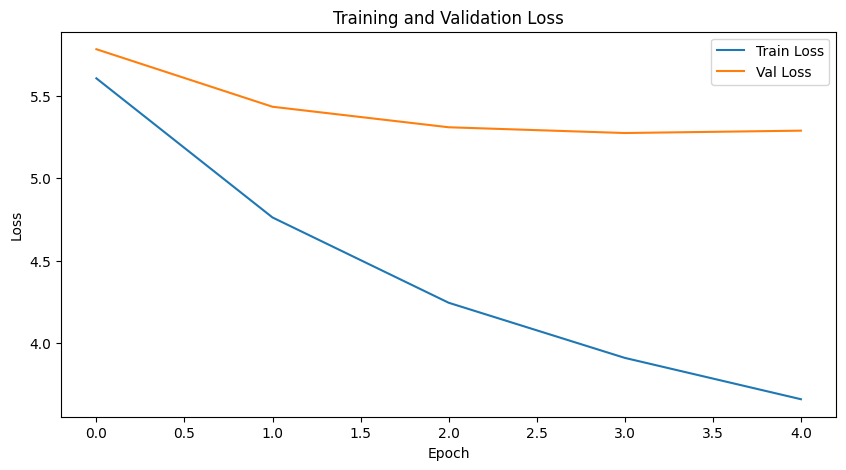

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [39]:
def translate_sentence(
    sentence, 
    model,
    en_nlp,
    de_nlp,
    en_vocab,
    de_vocab,
    lower,
    sos_token,
    eos_token,
    device,
    max_output_length=25,
):
    model.eval()
    with torch.no_grad():
        if isinstance(sentence, str):
            de_tokens = [token.text for token in de_nlp.tokenizer(sentence)]
        else:
            de_tokens = [token for token in sentence]
        if lower:
            de_tokens = [token.lower() for token in de_tokens]
        de_tokens = [sos_token] + de_tokens + [eos_token]
        ids = de_vocab.lookup_indices(de_tokens)
        tensor = torch.LongTensor(ids).unsqueeze(-1).to(device)
        encoder_outputs, hidden = model.encoder(tensor)
        inputs = en_vocab.lookup_indices([sos_token])
        attentions = torch.zeros(max_output_length, 1, len(ids))
        for i in range(max_output_length):
            inputs_tensor = torch.LongTensor([inputs[-1]]).to(device)
            output, hidden, attention = model.decoder(inputs_tensor, hidden, encoder_outputs)
            attentions[i] = attention
            predicted_token = output.argmax(-1).item()
            inputs.append(predicted_token)
            if predicted_token == en_vocab[eos_token]:
                break
        en_tokens = en_vocab.lookup_tokens(inputs)
    return en_tokens, de_tokens, attentions[:len(en_tokens)-1]

In [52]:
def plot_attention(sentence, translation, attention):
    fig, ax = plt.subplots(figsize=(10,10))
    attention = attention.squeeze(1).numpy()
    cax = ax.matshow(attention, cmap="bone")
    ax.set_xticks(ticks=np.arange(len(sentence)), labels=sentence, rotation=90, size=15)
    translation = translation[1:]
    ax.set_yticks(ticks=np.arange(len(translation)), labels=translation, size=15)
    plt.show()
    plt.close()

In [59]:
sentence = valid_dataset[0]["it"]
expected_translation = valid_dataset[0]["en"]

sentence, expected_translation

("Desidero però esprimere tutta la mia gratitudine per l'interesse dimostrato per questo dibattito.",
 'I do, however, wish to express my heartfelt thanks for the interest you have shown in this debate.')

In [60]:
translation, sentence_tokens, attention = translate_sentence(
    sentence,
    model,
    en_nlp,
    it_nlp,
    en_vocab,
    it_vocab,
    lower,
    sos_token,
    eos_token,
    device,
)

print(translation)
print(sentence_tokens)

['<sos>', 'i', 'would', 'like', 'to', 'express', 'my', 'gratitude', 'for', 'the', 'interest', 'for', 'this', 'debate', '.', '<eos>']
['<sos>', 'desidero', 'però', 'esprimere', 'tutta', 'la', 'mia', 'gratitudine', 'per', "l'", 'interesse', 'dimostrato', 'per', 'questo', 'dibattito', '.', '<eos>']


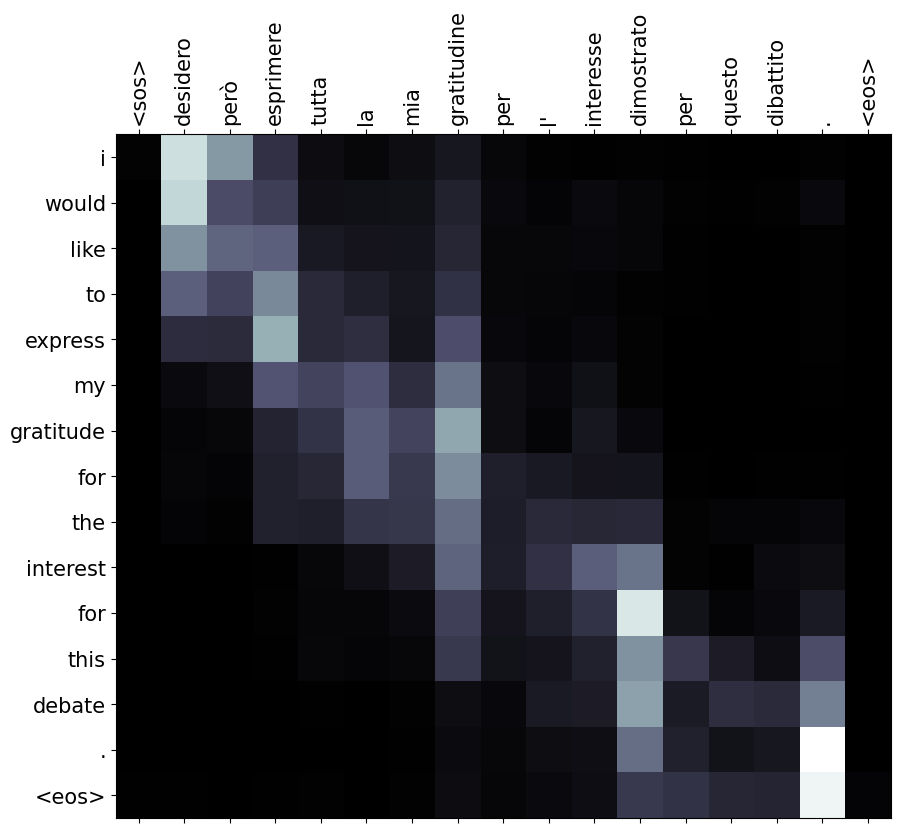

In [61]:
plot_attention(sentence_tokens, translation, attention)

Бачимо, що переклад не співпадає на 100%, але сенс речення добре переданий і непогано складено з точку зору граматики. Модель вірно підхопила взаємозв'язок між словами express та esprimere за допомогою attention scores, а також gratitude та gratitudine, interest та interesse. Варто зазначити, що й людина, не знаючи італійську, змогла б зіставити ці слова за схожістю напимсання. І хоча, модель навчається за токенами слів, а не словосполучень чи окремих символів, тобто схожість написання не мала б давати схожі ембединги та в свою чергу схожі приховані стани енкодеру та декодеру, на основі яких і вираховуються attention scores, тим не менш, модель гарно впоралася саме із схожими за написанням словами. А слово dimonstrato модель не співставила з англійським show

In [62]:
sentence = valid_dataset[5]["it"]
expected_translation = valid_dataset[5]["en"]

sentence, expected_translation

("Signor Presidente, il Consiglio non è mai stato chiamato a discutere dei fatti citati dall' onorevole parlamentare.",
 'Mr President, the Council has never been asked to discuss the issue raised by the honourable Member.')

In [63]:
translation, sentence_tokens, attention = translate_sentence(
    sentence,
    model,
    en_nlp,
    it_nlp,
    en_vocab,
    it_vocab,
    lower,
    sos_token,
    eos_token,
    device,
)

print(translation)
print(sentence_tokens)

['<sos>', 'mr', 'president', ',', 'the', 'council', 'has', 'not', 'been', 'to', 'to', 'the', 'the', 'of', 'the', 'honourable', 'member', '.', '<eos>']
['<sos>', 'signor', 'presidente', ',', 'il', 'consiglio', 'non', 'è', 'mai', 'stato', 'chiamato', 'a', 'discutere', 'dei', 'fatti', 'citati', 'dall', "'", 'onorevole', 'parlamentare', '.', '<eos>']


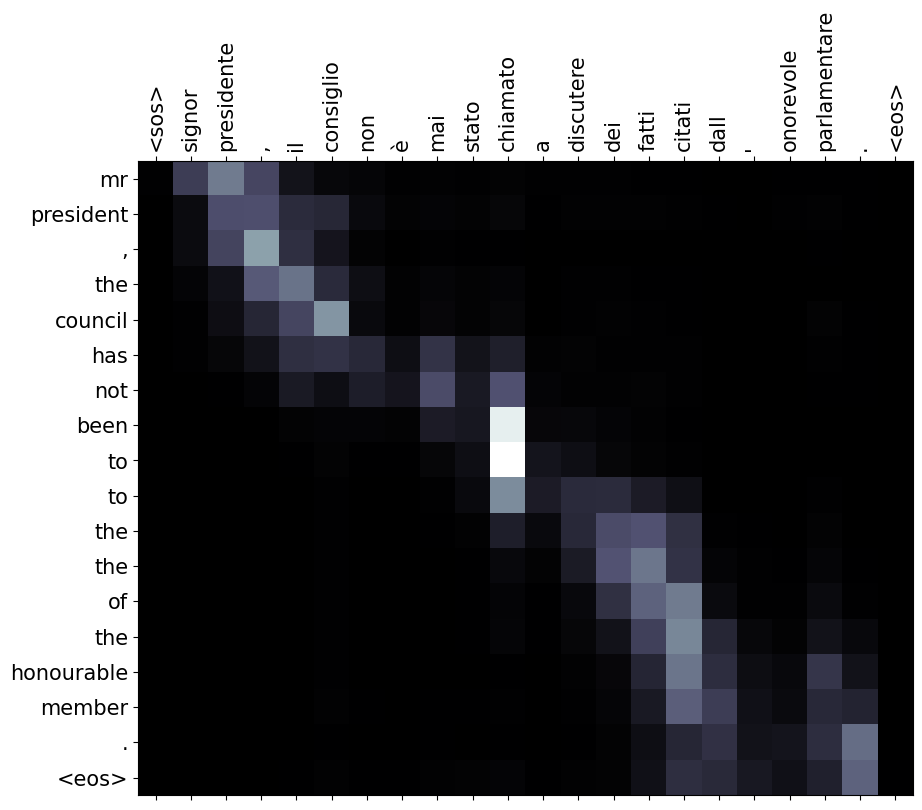

In [64]:
plot_attention(sentence_tokens, translation, attention)

З цього речення модель успішно переклала більшу частину слів, але не впоралася із граматичною конструкцією речення. Бачимо, що прийменники та артиклі перекладаються гірше, ніж самостійні частини мови, що сементично більш значущі.

In [66]:
sentence = valid_dataset[11]["it"]
expected_translation = valid_dataset[11]["en"]

sentence, expected_translation

('Il primo punto è quello della corporate governance.',
 'The first point concerns corporate governance.')

In [67]:
translation, sentence_tokens, attention = translate_sentence(
    sentence,
    model,
    en_nlp,
    it_nlp,
    en_vocab,
    it_vocab,
    lower,
    sos_token,
    eos_token,
    device,
)

print(translation)
print(sentence_tokens)

['<sos>', 'the', 'first', 'point', 'is', 'the', 'expression', 'of', 'the', '.', '<eos>']
['<sos>', 'il', 'primo', 'punto', 'è', 'quello', 'della', 'corporate', 'governance', '.', '<eos>']


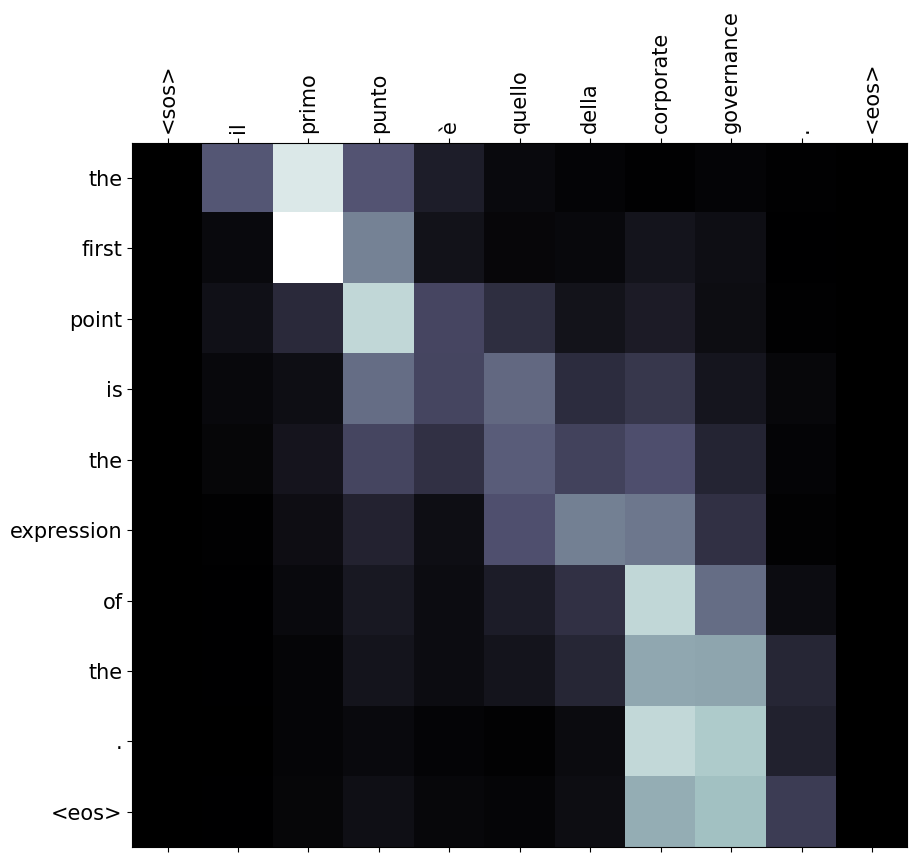

In [68]:
plot_attention(sentence_tokens, translation, attention)

В цьому прикладі перша частина речення перекладена без помилок, а сенс другою частини втрачений. Можливо, модель не навчилася при тому, що corporate governance звучить однаково в обох мовах. Отже, схожість написання дійсно не має значення для даної моделі.

## Висновки

Для тренування моделы для автоматичного перекладу було використано набір даних Helsinki-NLP/europarl, а саме пара англіська/італійська мови. Завантажено лише 3% обсягу датасету для можливості тренування моделі на доступному обсязі GPU.

За допомогою spacy створено словники і токенізовано датасети, використано моделі середнього розміру, враховуючи специфічність лексики в датасеті. З отриманих токенів побудовано словники за допомогою torchtext та закодовано слова їх індексами в словнику. Далі датасети перетворено на тензори, розбито на батчі та передано до моделі Sequense-to-sequence. 

Кількість батчів була зменшена до 32 для запобігання out of memory. Також зменшено розмір шару ембедингів в енкодері та декодері до 128, а шару GRU до 256. 

Модель навчалась 5 епох, і вже після 3 спостерігалося перенавчання, при цьому на валідаційному датасеті функція втрат не досягла бажаних результатів. Це пояснюється як обмеженістю даних, так і базовою архітектурою моделі. Для покращення результатів можна застосувати наступе:
- навчити модель рна більшому обсязі даних
- ускладнити архітектуру моделі, додавши додаткові шари GRU
- збільшити кількість юнітив GRU
- застосувати попередньо натреновані ембединги
- застосувати більш складну формулу розрахунку attention scores
- застосувати модель трансформеру замість seq-to-seq

Не дивлячись на обмеження реалізованої архітектури, моделі вдалося навчитися перекладати більш розповсюджені слова самостійних частин мови, деякі речення навіть непогано складені граматично, інші є лише переліком слів, але контекст передано добре.